### Import All the Dependencies for Data Distribution Analysis and Hashtag Wordcloud

In [9]:
import pandas as pd
import numpy as np
import re
import datetime as dt
warnings.filterwarnings("ignore")
!pip install wordcloud
!pip install plotly
from pandas.io.json import json_normalize
import warnings
from sklearn.feature_extraction.text import CountVectorizer
import random
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import csv
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

     |████████████████████████████████| 27.7 MB 3.8 MB/s eta 0:00:01


## Central Tendencies of the Twitter Sentiment Dataset

### Load the Dataset

In [219]:
sentiment_data_df = pd.read_csv("Datasets_Final_Project/tweet_sentiments_with_additional_countries_with_0.3_bins.csv")
sentiment_data_df.head(3)

tweetcreatedts                                               text  \
0     2022-03-08                               a fox s tale   for     
1     2022-03-08                           ukraine                    
2     2022-03-08   russia s  enlargement redlines     cable from...   

                 location                                           hashtags  \
0         Orkney Scotland         [{'text': 'Ukraine', 'indices': [19, 27]}]   
1          Hyères, France  [{'text': 'Ukraine', 'indices': [11, 19]}, {'t...   
2  Essonne, Ile-de-France  [{'text': 'NATO', 'indices': [25, 30]}, {'text...   

   retweetcount  favorite_count country  neg  neu  pos  compound sentiment  \
0           0.0             0.0      uk  0.0  1.0  0.0       0.0   neutral   
1           0.0             0.0  france  0.0  1.0  0.0       0.0   neutral   
2        1377.0             0.0  france  0.0  1.0  0.0       0.0   neutral   

   neg.1  neu.1  pos.1  compound.1  
0    0.0    1.0    0.0         0.0  
1    0.0    1.0    0.0         0.0  
2    0.0    1.0    0.0         0.0

### Central Tendencies Analysis

In [221]:
data_describe = sentiment_data_df[['compound']].describe()
data_describe

compound
count  2.103692e+06
mean  -6.698872e-02
std    5.278712e-01
min   -9.977000e-01
25%   -5.267000e-01
50%    0.000000e+00
75%    3.818000e-01
max    9.961000e-01

### Plot the summary of the data

Text(0.5, 0, 'Sentiment Score')

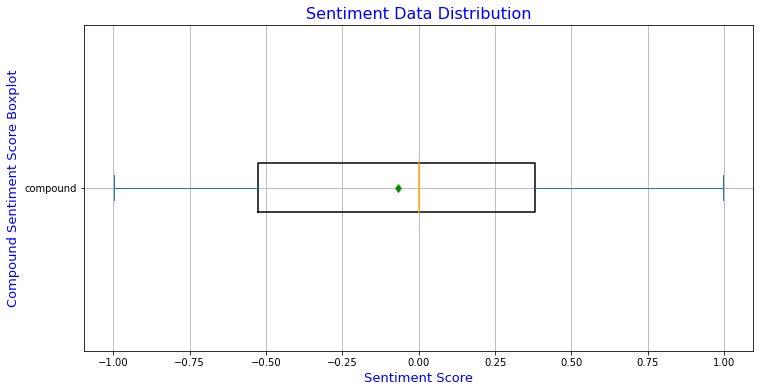

In [271]:
# plot a boxplot
sentiment_scores = sentiment_data_df['compound']

box_props = dict(color="black",linewidth=1.5)
median_props = dict(color="orange",linewidth=1.5)
mean_props = dict(markerfacecolor='green',marker='d',linewidth=1.5)
sentiment_scores.plot(kind = 'box',meanprops=mean_props,grid=True,showmeans=True,medianprops=median_props,boxprops=box_props,figsize=(12,6),vert=False)
plt.pyplot.title('Sentiment Data Distribution',fontsize=16, c = 'blue')
plt.pyplot.ylabel('Compound Sentiment Score Boxplot',fontsize=13, c = 'blue')
plt.pyplot.xlabel('Sentiment Score',fontsize=13, c = 'blue')

Text(0, 0.5, 'Sentiment Score')

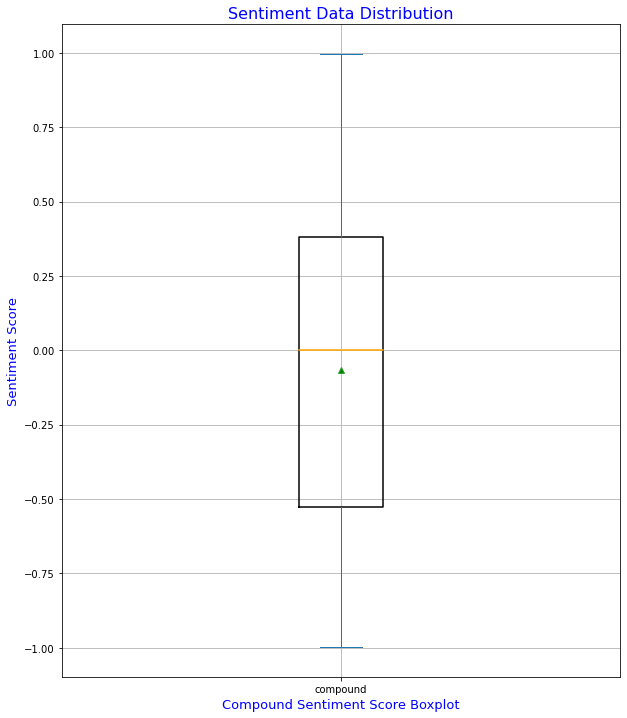

In [273]:
# plot a boxplot
sentiment_scores = sentiment_data_df['compound']

box_props = dict(color="black",linewidth=1.5)
median_props = dict(color="orange",linewidth=1.5)
mean_props = dict(markerfacecolor='green',marker='^')
grid_props = dict(c='grey',linewidth=0.5)
sentiment_scores.plot(kind = 'box',meanprops=mean_props,showmeans=True,medianprops=median_props,boxprops=box_props,grid=True,figsize=(10,12))
plt.pyplot.title('Sentiment Data Distribution',fontsize=16, c = 'blue')
plt.pyplot.xlabel('Compound Sentiment Score Boxplot',fontsize=13, c = 'blue')
plt.pyplot.ylabel('Sentiment Score',fontsize=13, c = 'blue')

Text(0, 0.5, 'Volume of Tweets')

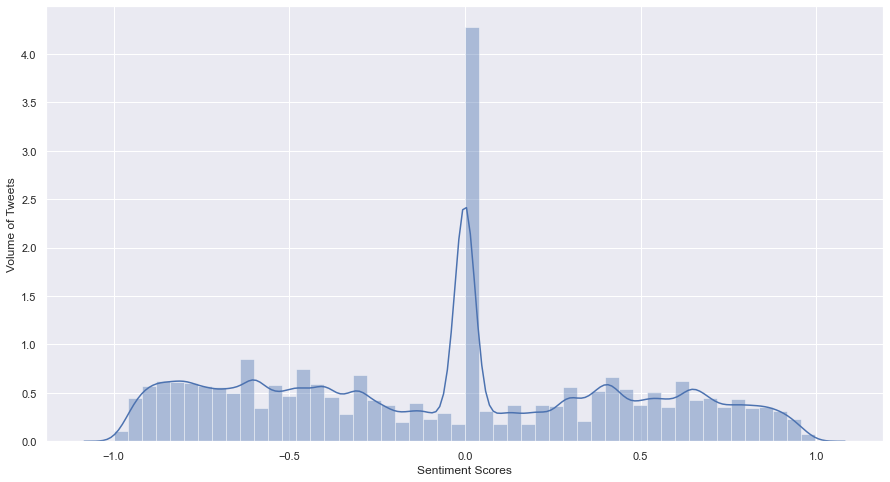

In [291]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.distplot(sentiment_scores)
p.set_xlabel('Sentiment Scores')
p.set_ylabel('Volume of Tweets')

<AxesSubplot:xlabel='compound', ylabel='Density'>

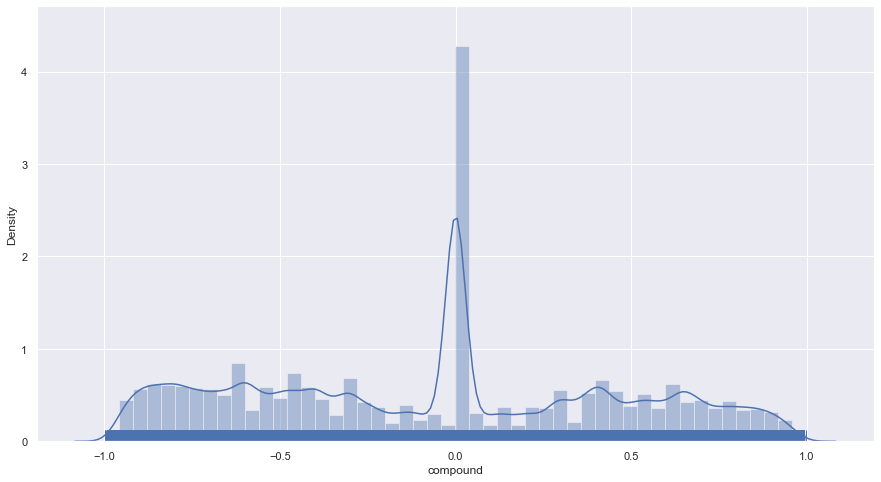

In [277]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(sentiment_scores,rug=True)

<AxesSubplot:xlabel='compound', ylabel='Density'>

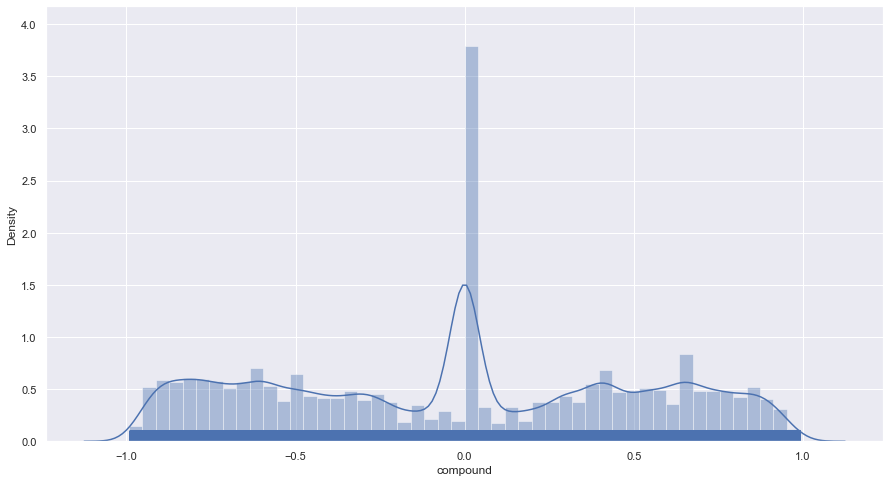

In [290]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(sentiment_data_df.compound[sentiment_data_df.country == 'uk'],rug=True)

## WordCloud

### Load the Tweets Sentiments Dataset into the notebook for Analysis and Wordcloud

In [2]:
tweet_sentiment_df = pd.read_csv('Datasets_Final_Project/all_tweets_consolidated.csv')

/var/folders/36/42s_c14d5kv7yjr4yyn4sr6h0000gn/T/ipykernel_98539/3359672429.py:1: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet_sentiment_df = pd.read_csv('Datasets_Final_Project/all_tweets_consolidated.csv')


In [18]:
tweet_sentiment_df.drop_duplicates(['tweetid'],inplace=True)

In [117]:
tweet_sentiment_df.shape

(10726248, 18)

In [184]:
tweet_sentiment_df.head(5)

Unnamed: 0               userid         username  \
0    3544308            454230077       veronicae9   
1    3544309  1166381062248783874  forcemultstevea   
2    3544310            159230211       tammytabby   
3    3544311  1498015615881302016  ArthurC54762353   
4    3544312   867157331494268929    GideonNeptune   

                                            acctdesc         location  \
0                                                NaN           madrid   
1  AI startup advisor 'force multiplier' who shap...       Olympia WA   
2  Native of New York City, NY. \nConservative.\n...        Georgia     
3                                                NaN              NaN   
4  Heard expert say “30% of a given population at...  Here, right now   

  following  followers totaltweets               usercreatedts  \
0    3546.0     1459.0    119958.0  2012-01-03 19:23:33.000000   
1    1020.0      731.0    101791.0  2019-08-27 16:05:01.000000   
2   15602.0    15597.0    411214.0  2010-06-24 20:40:35.000000   
3       1.0        3.0       394.0  2022-02-27 19:23:16.000000   
4   14199.0    12827.0    134139.0  2017-05-23 23:16:33.000000   

                 tweetid       tweetcreatedts retweetcount  \
0  1500984943371030528.0  2022-03-08 00:01:12         35.0   
1  1500984943639289856.0  2022-03-08 00:01:12         32.0   
2  1500984943668834304.0  2022-03-08 00:01:12         79.0   
3  1500984944117620736.0  2022-03-08 00:01:12         30.0   
4  1500984944222478336.0  2022-03-08 00:01:12        127.0   

                                                text  \
0  Guillaume Briquet herido y hospitalizado en #M...   
1  "Kyiv Ghost" shot down the #Russian Caliber cr...   
2  #China wants to mediate the #Ukraine war to re...   
3  Russian soldiers killed the parents of a 17-ye...   
4  If 80-year-old Ukrainian women are using their...   

                                            hashtags language coordinates  \
0        [{'text': 'Mykolaev', 'indices': [60, 69]}]       es         NaN   
1  [{'text': 'Russian', 'indices': [45, 53]}, {'t...       en         NaN   
2  [{'text': 'China', 'indices': [18, 24]}, {'tex...       en         NaN   
3                                                 []       en         NaN   
4                                                 []       en         NaN   

   favorite_count                 extractedts  
0             0.0  2022-03-08 00:07:18.782816  
1             0.0  2022-03-08 00:07:18.766227  
2             0.0  2022-03-08 00:07:18.758033  
3             0.0  2022-03-08 00:07:18.749824  
4             0.0  2022-03-08 00:07:18.741431

In [104]:
# transpose the dataframe to get a better look at the df properties
tweet_sentiment_df[0:2].T

0  \
Unnamed: 0                                                3544308   
userid                                                  454230077   
username                                               veronicae9   
acctdesc                                                      NaN   
location                                                   madrid   
following                                                  3546.0   
followers                                                  1459.0   
totaltweets                                              119958.0   
usercreatedts                          2012-01-03 19:23:33.000000   
tweetid                                     1500984943371030528.0   
tweetcreatedts                                2022-03-08 00:01:12   
retweetcount                                                 35.0   
text            Guillaume Briquet herido y hospitalizado en #M...   
hashtags              [{'text': 'Mykolaev', 'indices': [60, 69]}]   
language                                                       es   
coordinates                                                   NaN   
favorite_count                                                0.0   
extractedts                            2022-03-08 00:07:18.782816   

                                                                1  
Unnamed: 0                                                3544309  
userid                                        1166381062248783874  
username                                          forcemultstevea  
acctdesc        AI startup advisor 'force multiplier' who shap...  
location                                               Olympia WA  
following                                                  1020.0  
followers                                                   731.0  
totaltweets                                              101791.0  
usercreatedts                          2019-08-27 16:05:01.000000  
tweetid                                     1500984943639289856.0  
tweetcreatedts                                2022-03-08 00:01:12  
retweetcount                                                 32.0  
text            "Kyiv Ghost" shot down the #Russian Caliber cr...  
hashtags        [{'text': 'Russian', 'indices': [45, 53]}, {'t...  
language                                                       en  
coordinates                                                   NaN  
favorite_count                                                0.0  
extractedts                            2022-03-08 00:07:18.766227

### Extract all English hashtags from the dataframe

In [105]:
# make a dataframe of english hashtags
hashtags = tweet_sentiment_df[tweet_sentiment_df['language'] == 'en']['hashtags'].tolist()
hashtags=list(set(hashtags))
TAGS=[]

for item in hashtags:
    TAGS+=item[1:-1].split('{')
TAGS2=[]
for item2 in TAGS:
    if item2!='':
        TAGS2+=[item2.split(': ')[1].split(',')[0][1:-1]]

### Get the hashtag text into a dataframe

In [134]:
hashtags_df_2 = pd.DataFrame(pd.Series(TAGS2))
hashtags_df_2.columns = ['hashtag']
hashtags_df_2.shape

(5505121, 1)

In [175]:
hashtags_df_2

hashtag
0                   Putin
1        RussianWarCrimes
2                 Ukraine
3        StandWithUkraine
4          ForYouthRights
...                   ...
5505116           Ukraine
5505117           avgeeks
5505118          aviation
5505119            Russia
5505120        Solidarity

[5505121 rows x 1 columns]

## Cleaning Hashtags

### Using regex, let us clean the hashtags to have only english characters and/ numbers

In [292]:
import re
hashtags_df_clean = hashtags_df_2['hashtag'].str.lower().replace(r"[^a-zA-Z0-9]+","",regex=True)

In [293]:
hashtags_clean_df = pd.DataFrame(pd.Series(hashtags_df_clean.value_counts(), name='count'))
hashtags_clean_df.head(3)

count
ukraine  663370
russia   374960
putin    242156

In [294]:
hashtags_clean_df['hashtag'] = hashtags_clean_df.index.tolist()
hashtags_clean_df.head(3)

count  hashtag
ukraine  663370  ukraine
russia   374960   russia
putin    242156    putin

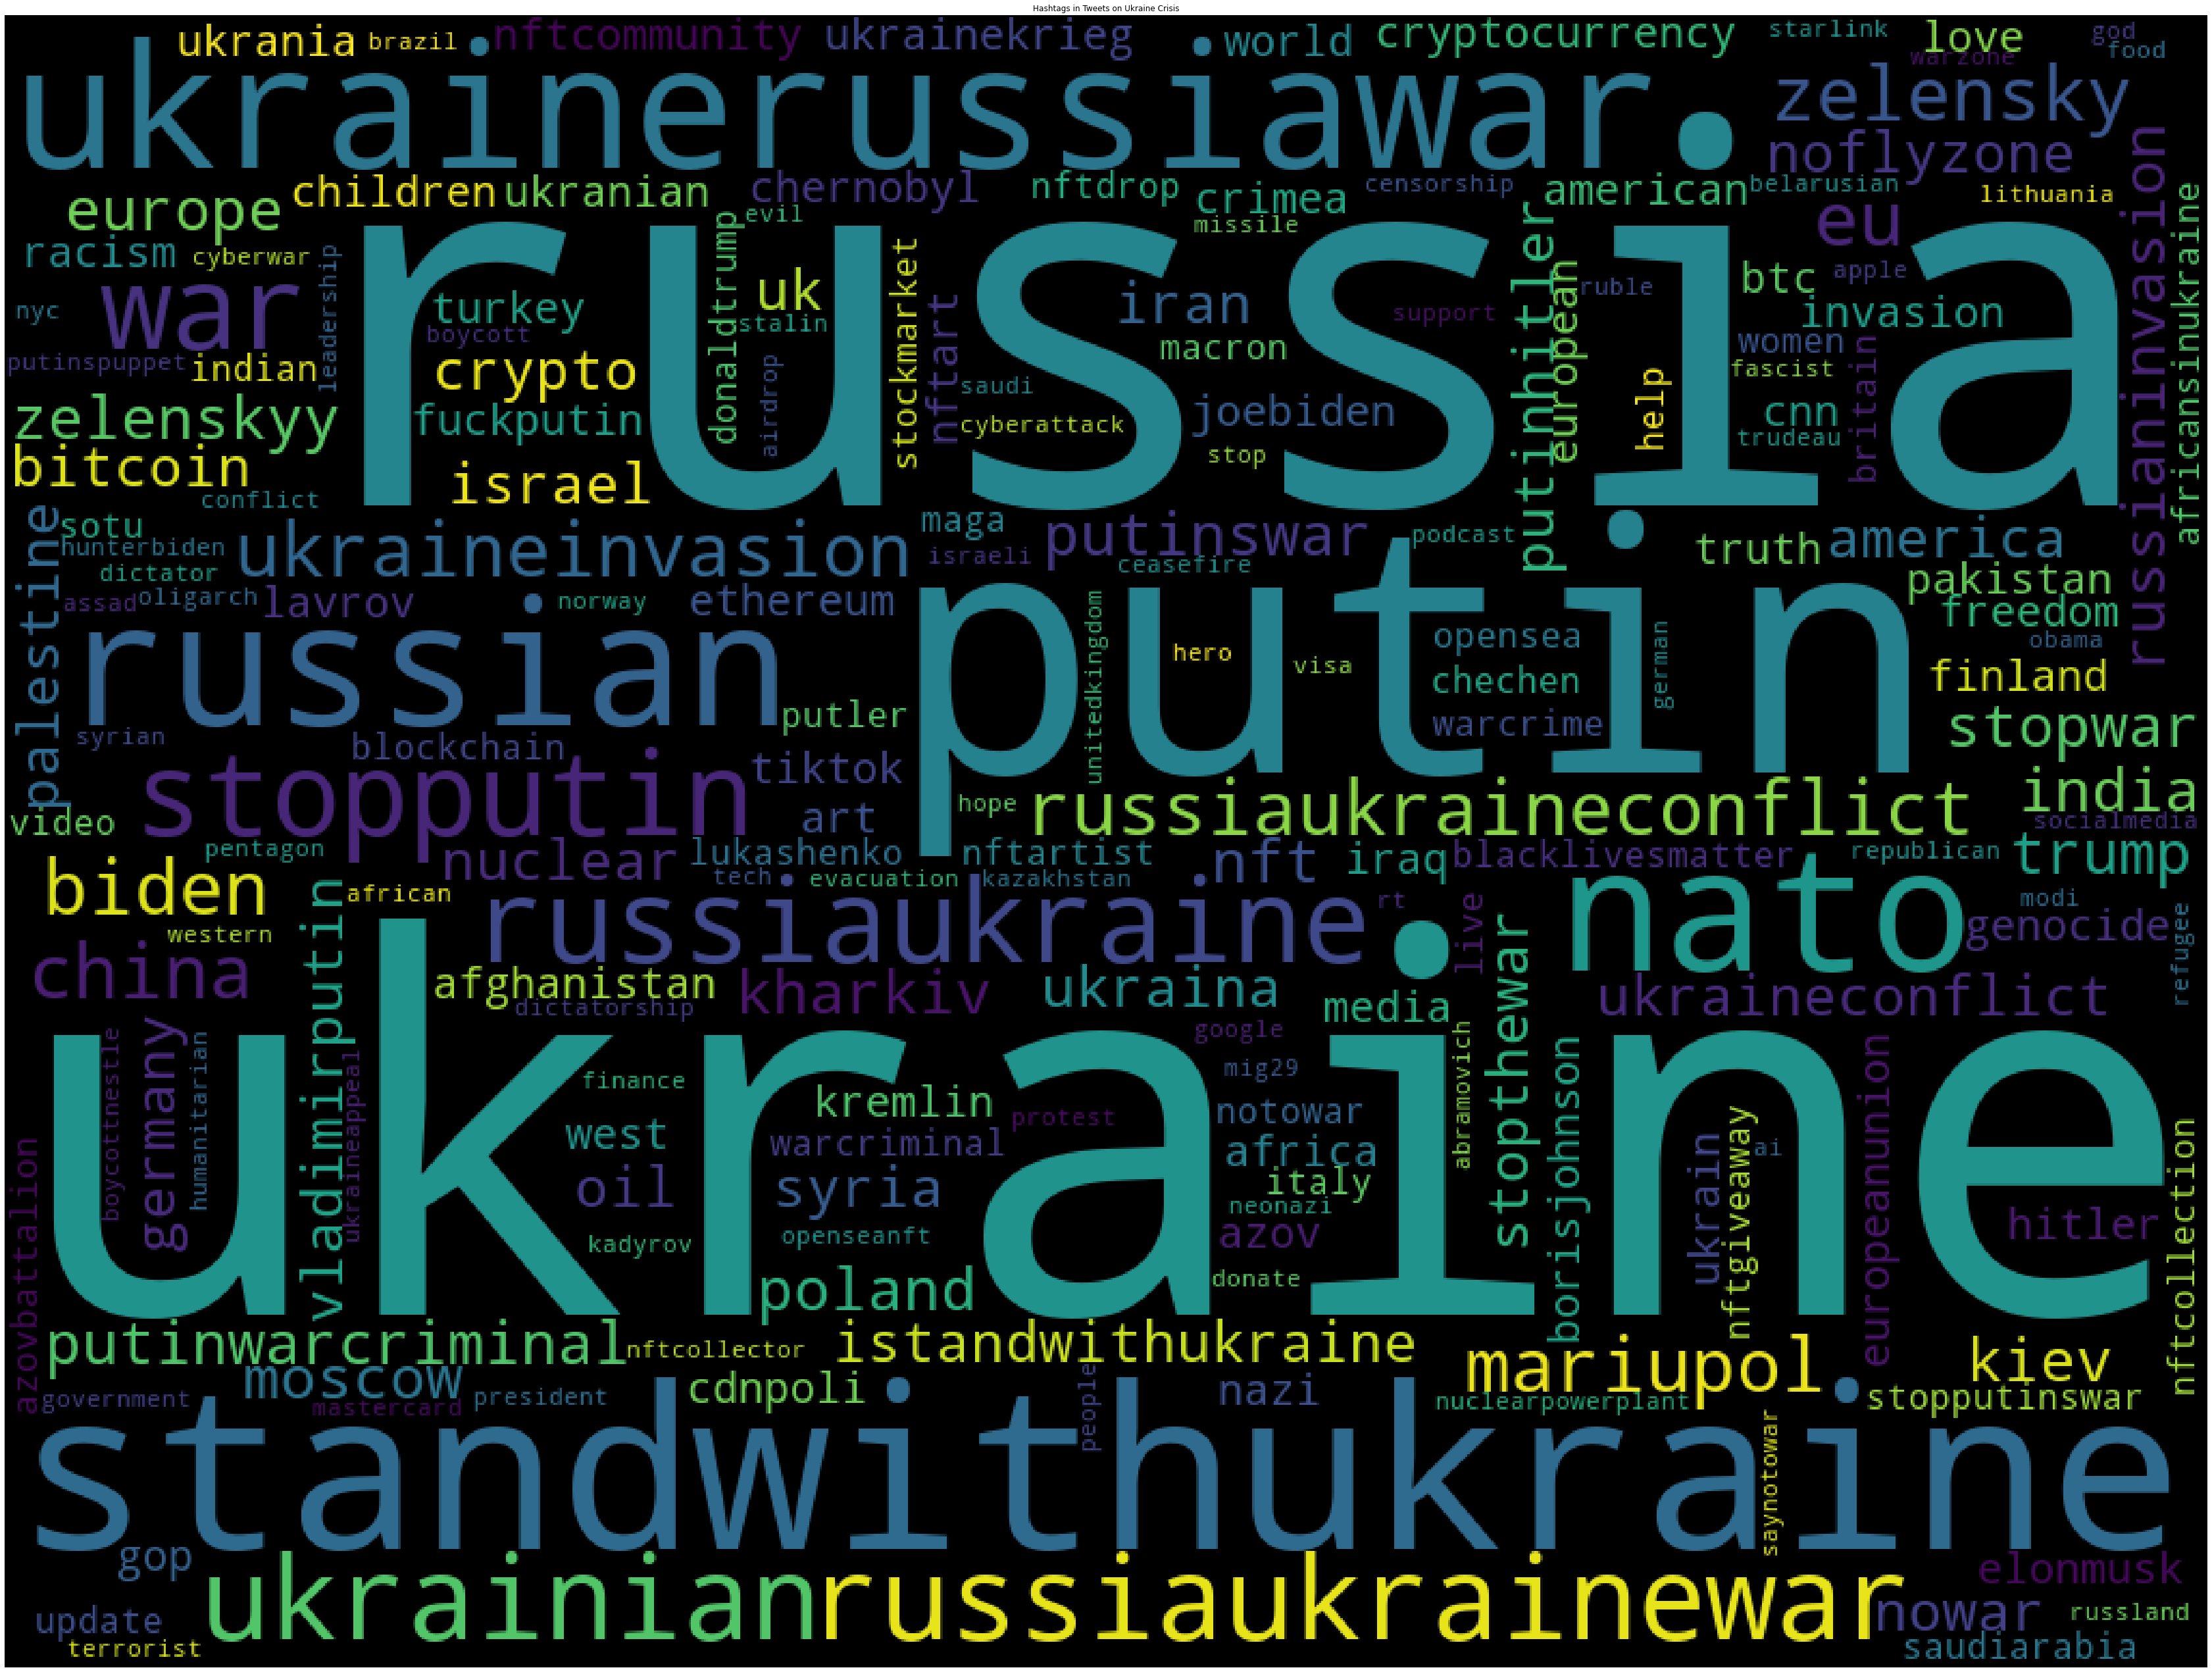

In [203]:
# Create a wordcloud of hashtags
fig,axs = plt.subplots(figsize=(60,60))
random.seed(2022)
random.shuffle(hashtags_clean_df['hashtag'].tolist())
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(hashtags_clean_df['hashtag'].tolist()))    
ax=axs.axis("off")   
ax=axs.set_title('Hashtags in Tweets on Ukraine Crisis')
ax=axs.imshow(wordcloud)
plt.show()

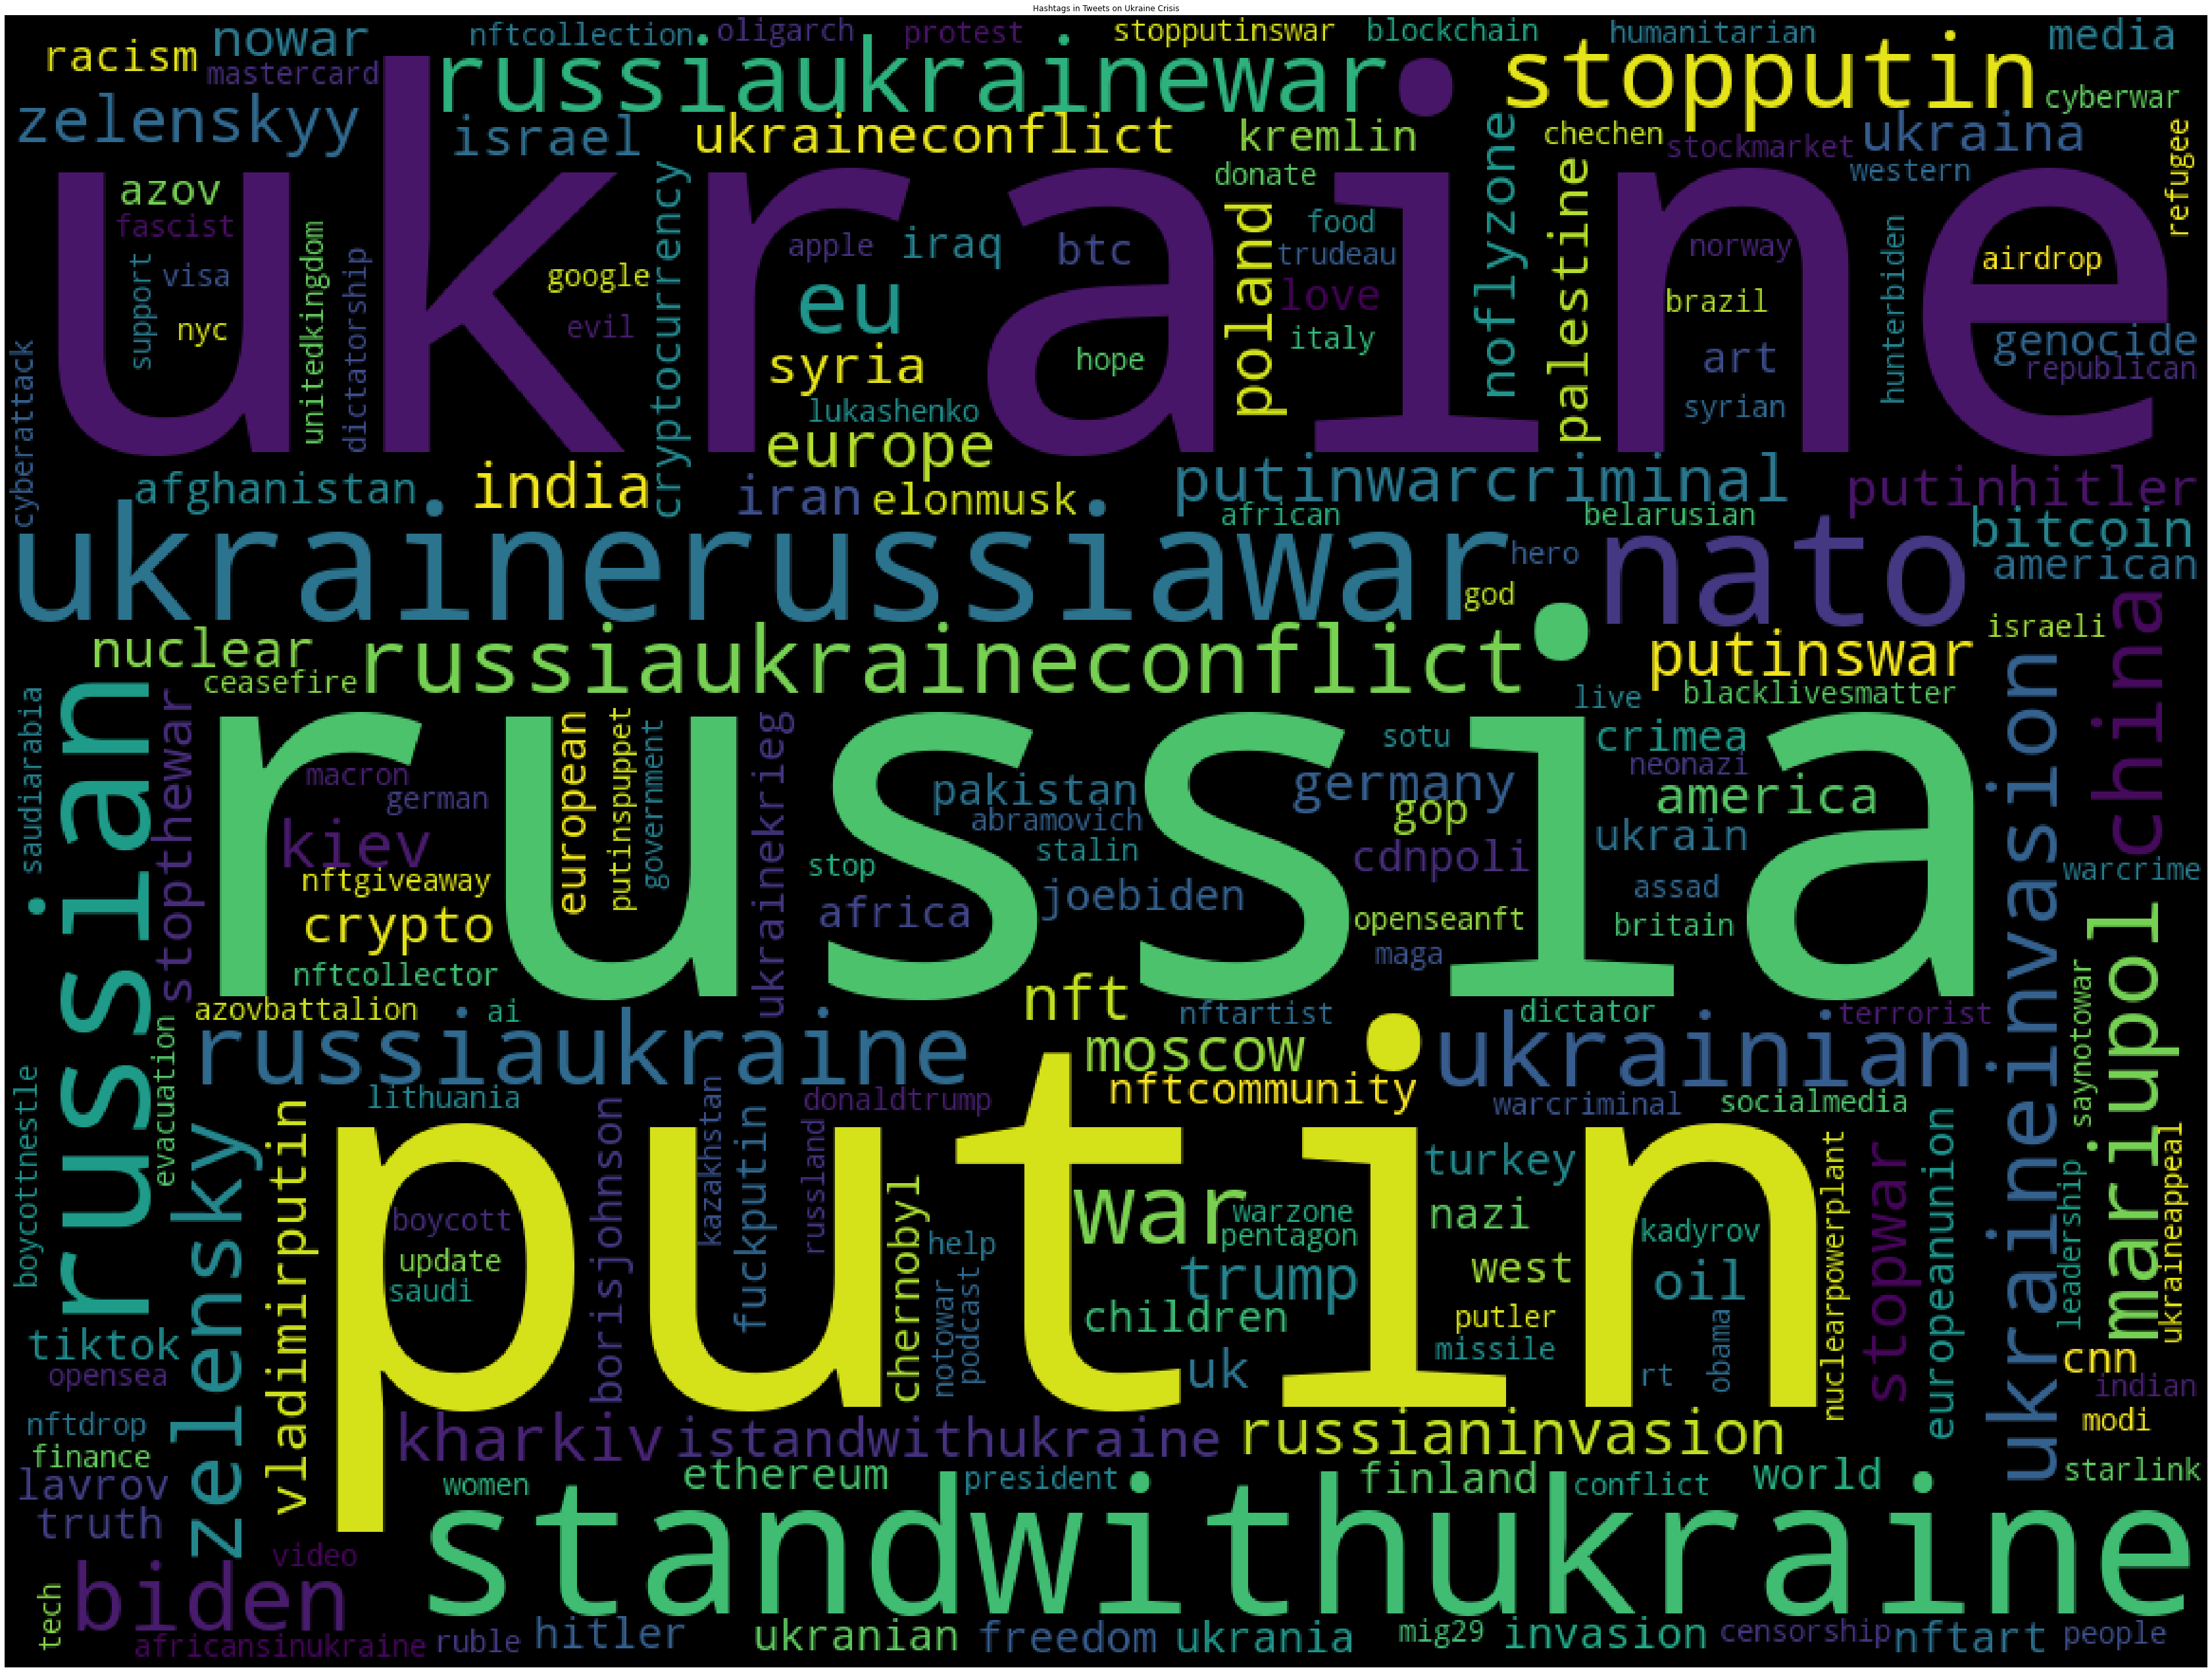

In [206]:
# Create a wordcloud of hashtags
fig,axs = plt.subplots(figsize=(60,60))
random.seed(2022)
random.shuffle(hashtags_clean_df['hashtag'].tolist())
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(hashtags_clean_df['hashtag'].tolist()))    
ax=axs.axis("off")   
ax=axs.set_title('Hashtags in Tweets on Ukraine Crisis')
ax=axs.imshow(wordcloud)
plt.show()

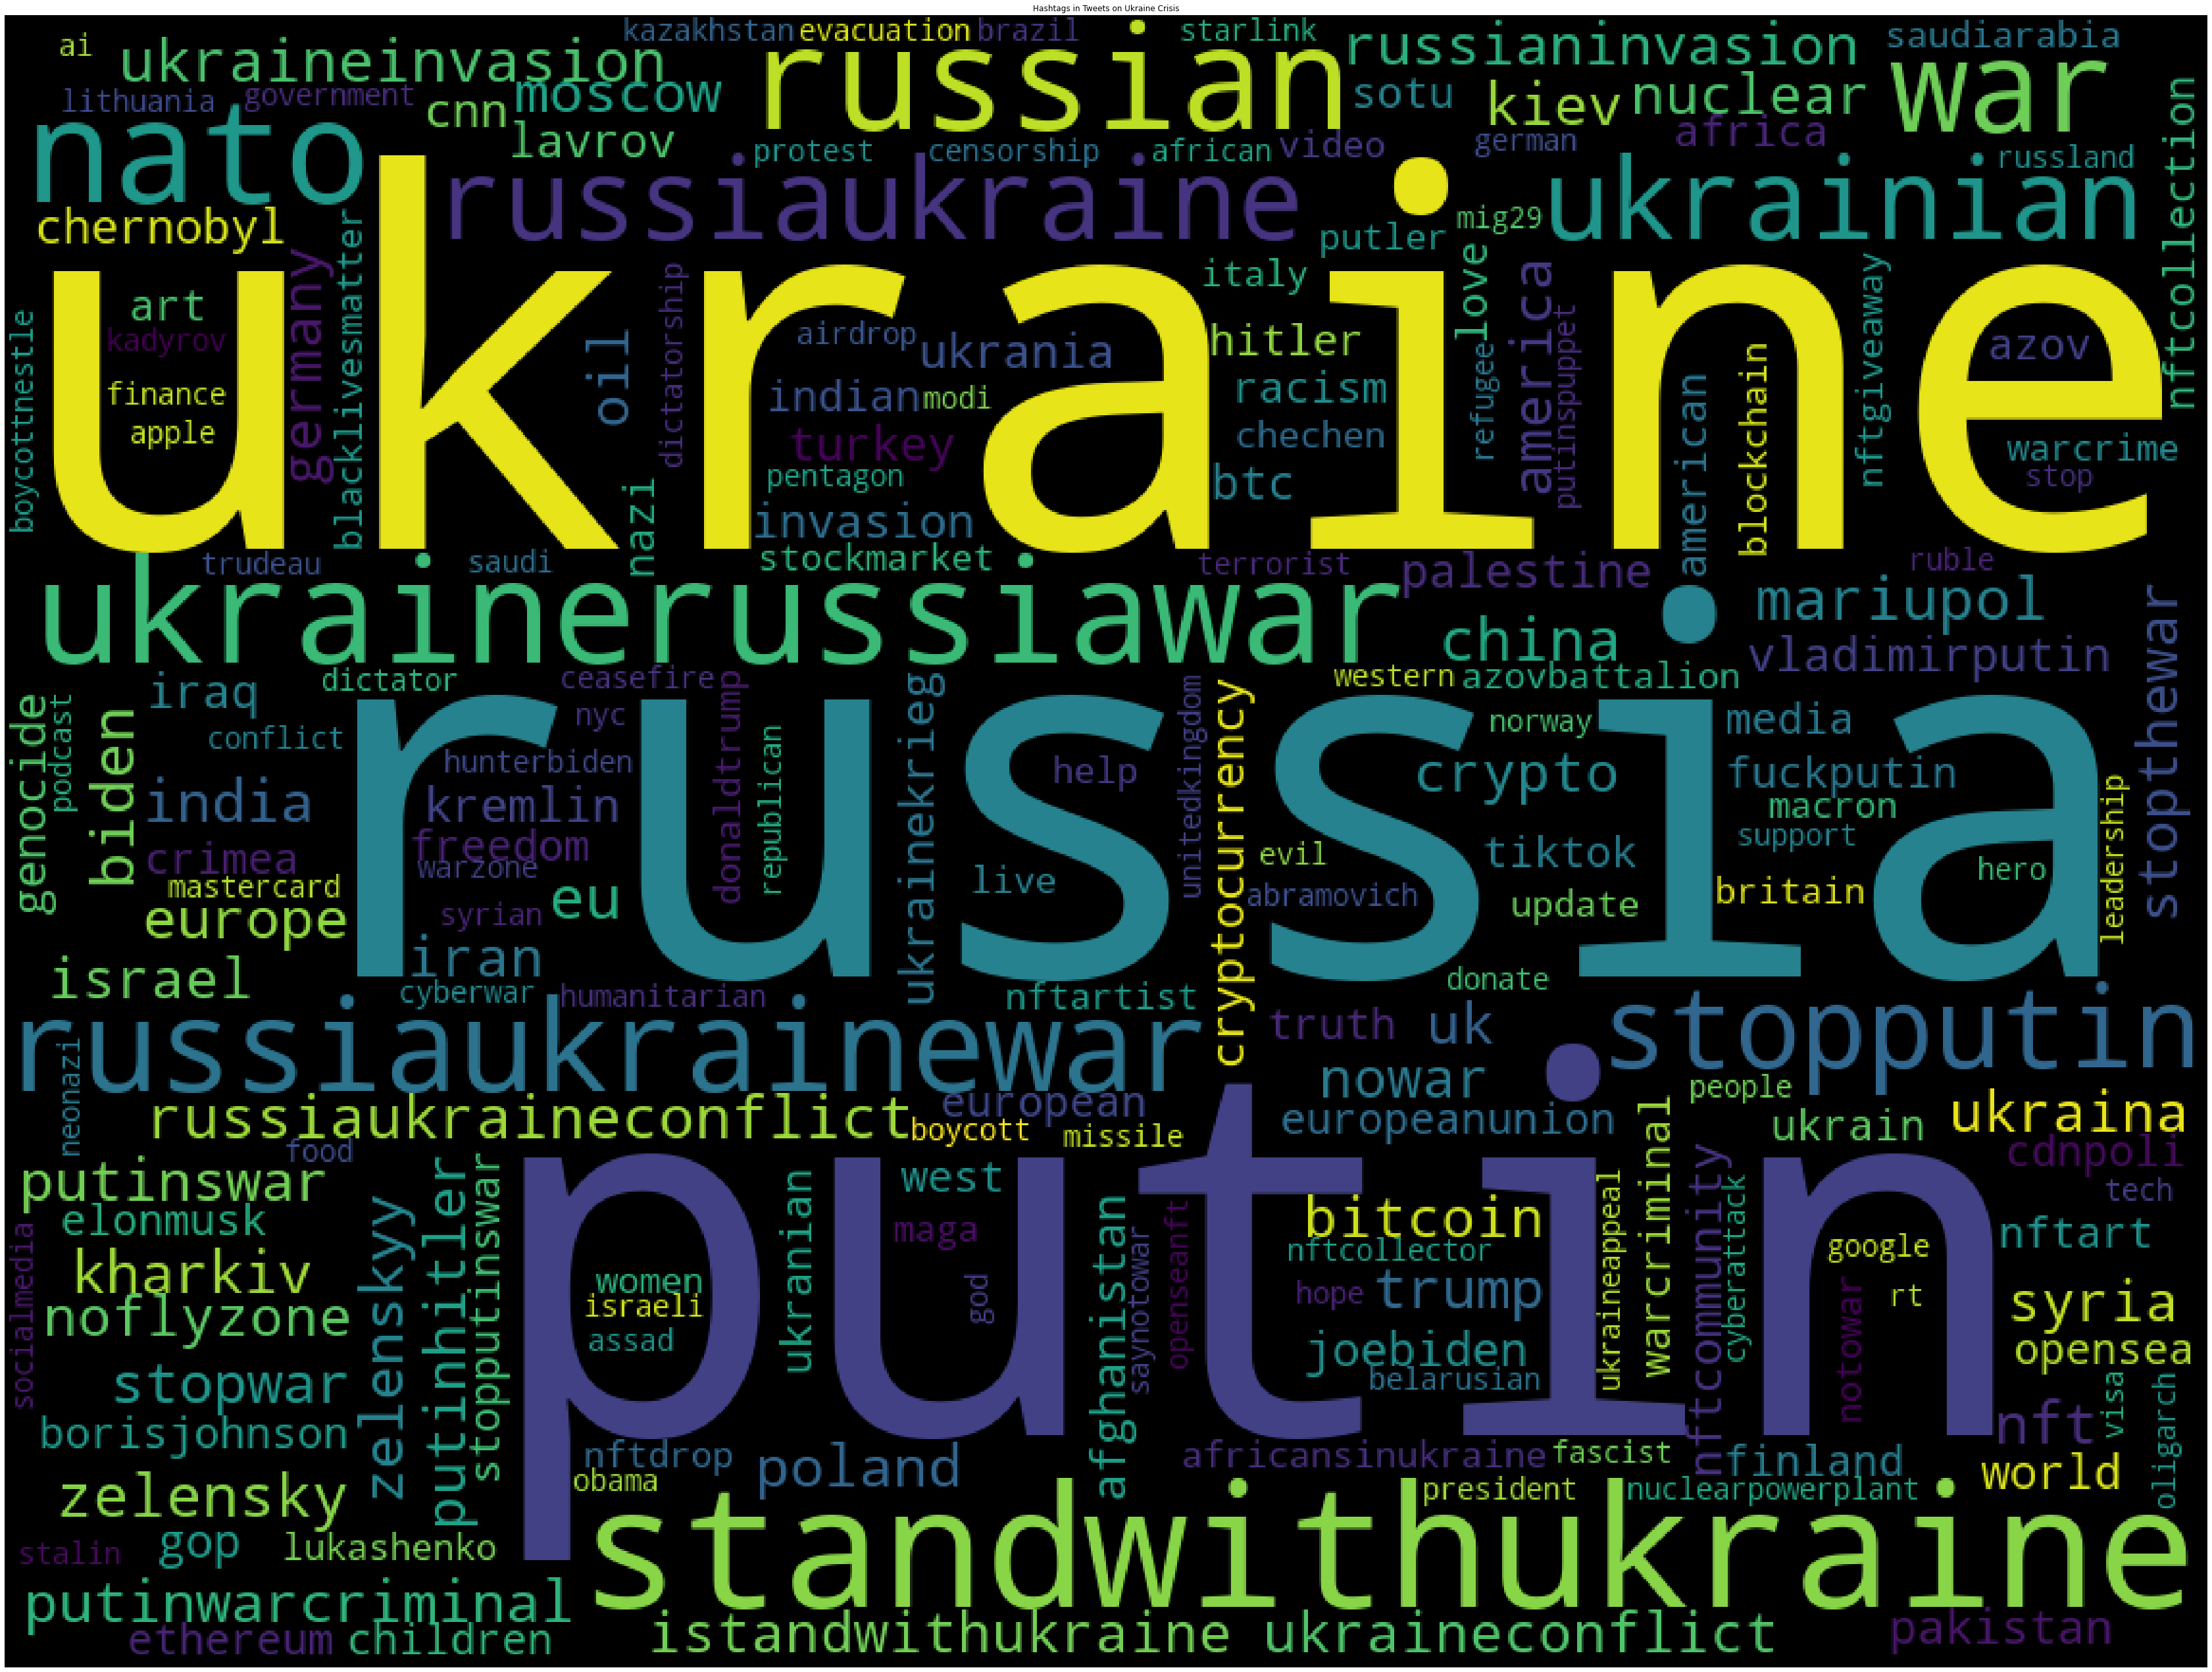

In [211]:
# Create a wordcloud of hashtags
fig,axs = plt.subplots(figsize=(60,60))
random.seed(2022)
random.shuffle(hashtags_clean_df['hashtag'].tolist())
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(hashtags_clean_df['hashtag'].tolist()))    
ax=axs.axis("off")   
ax=axs.set_title('Hashtags in Tweets on Ukraine Crisis')
ax=axs.imshow(wordcloud)
plt.show()

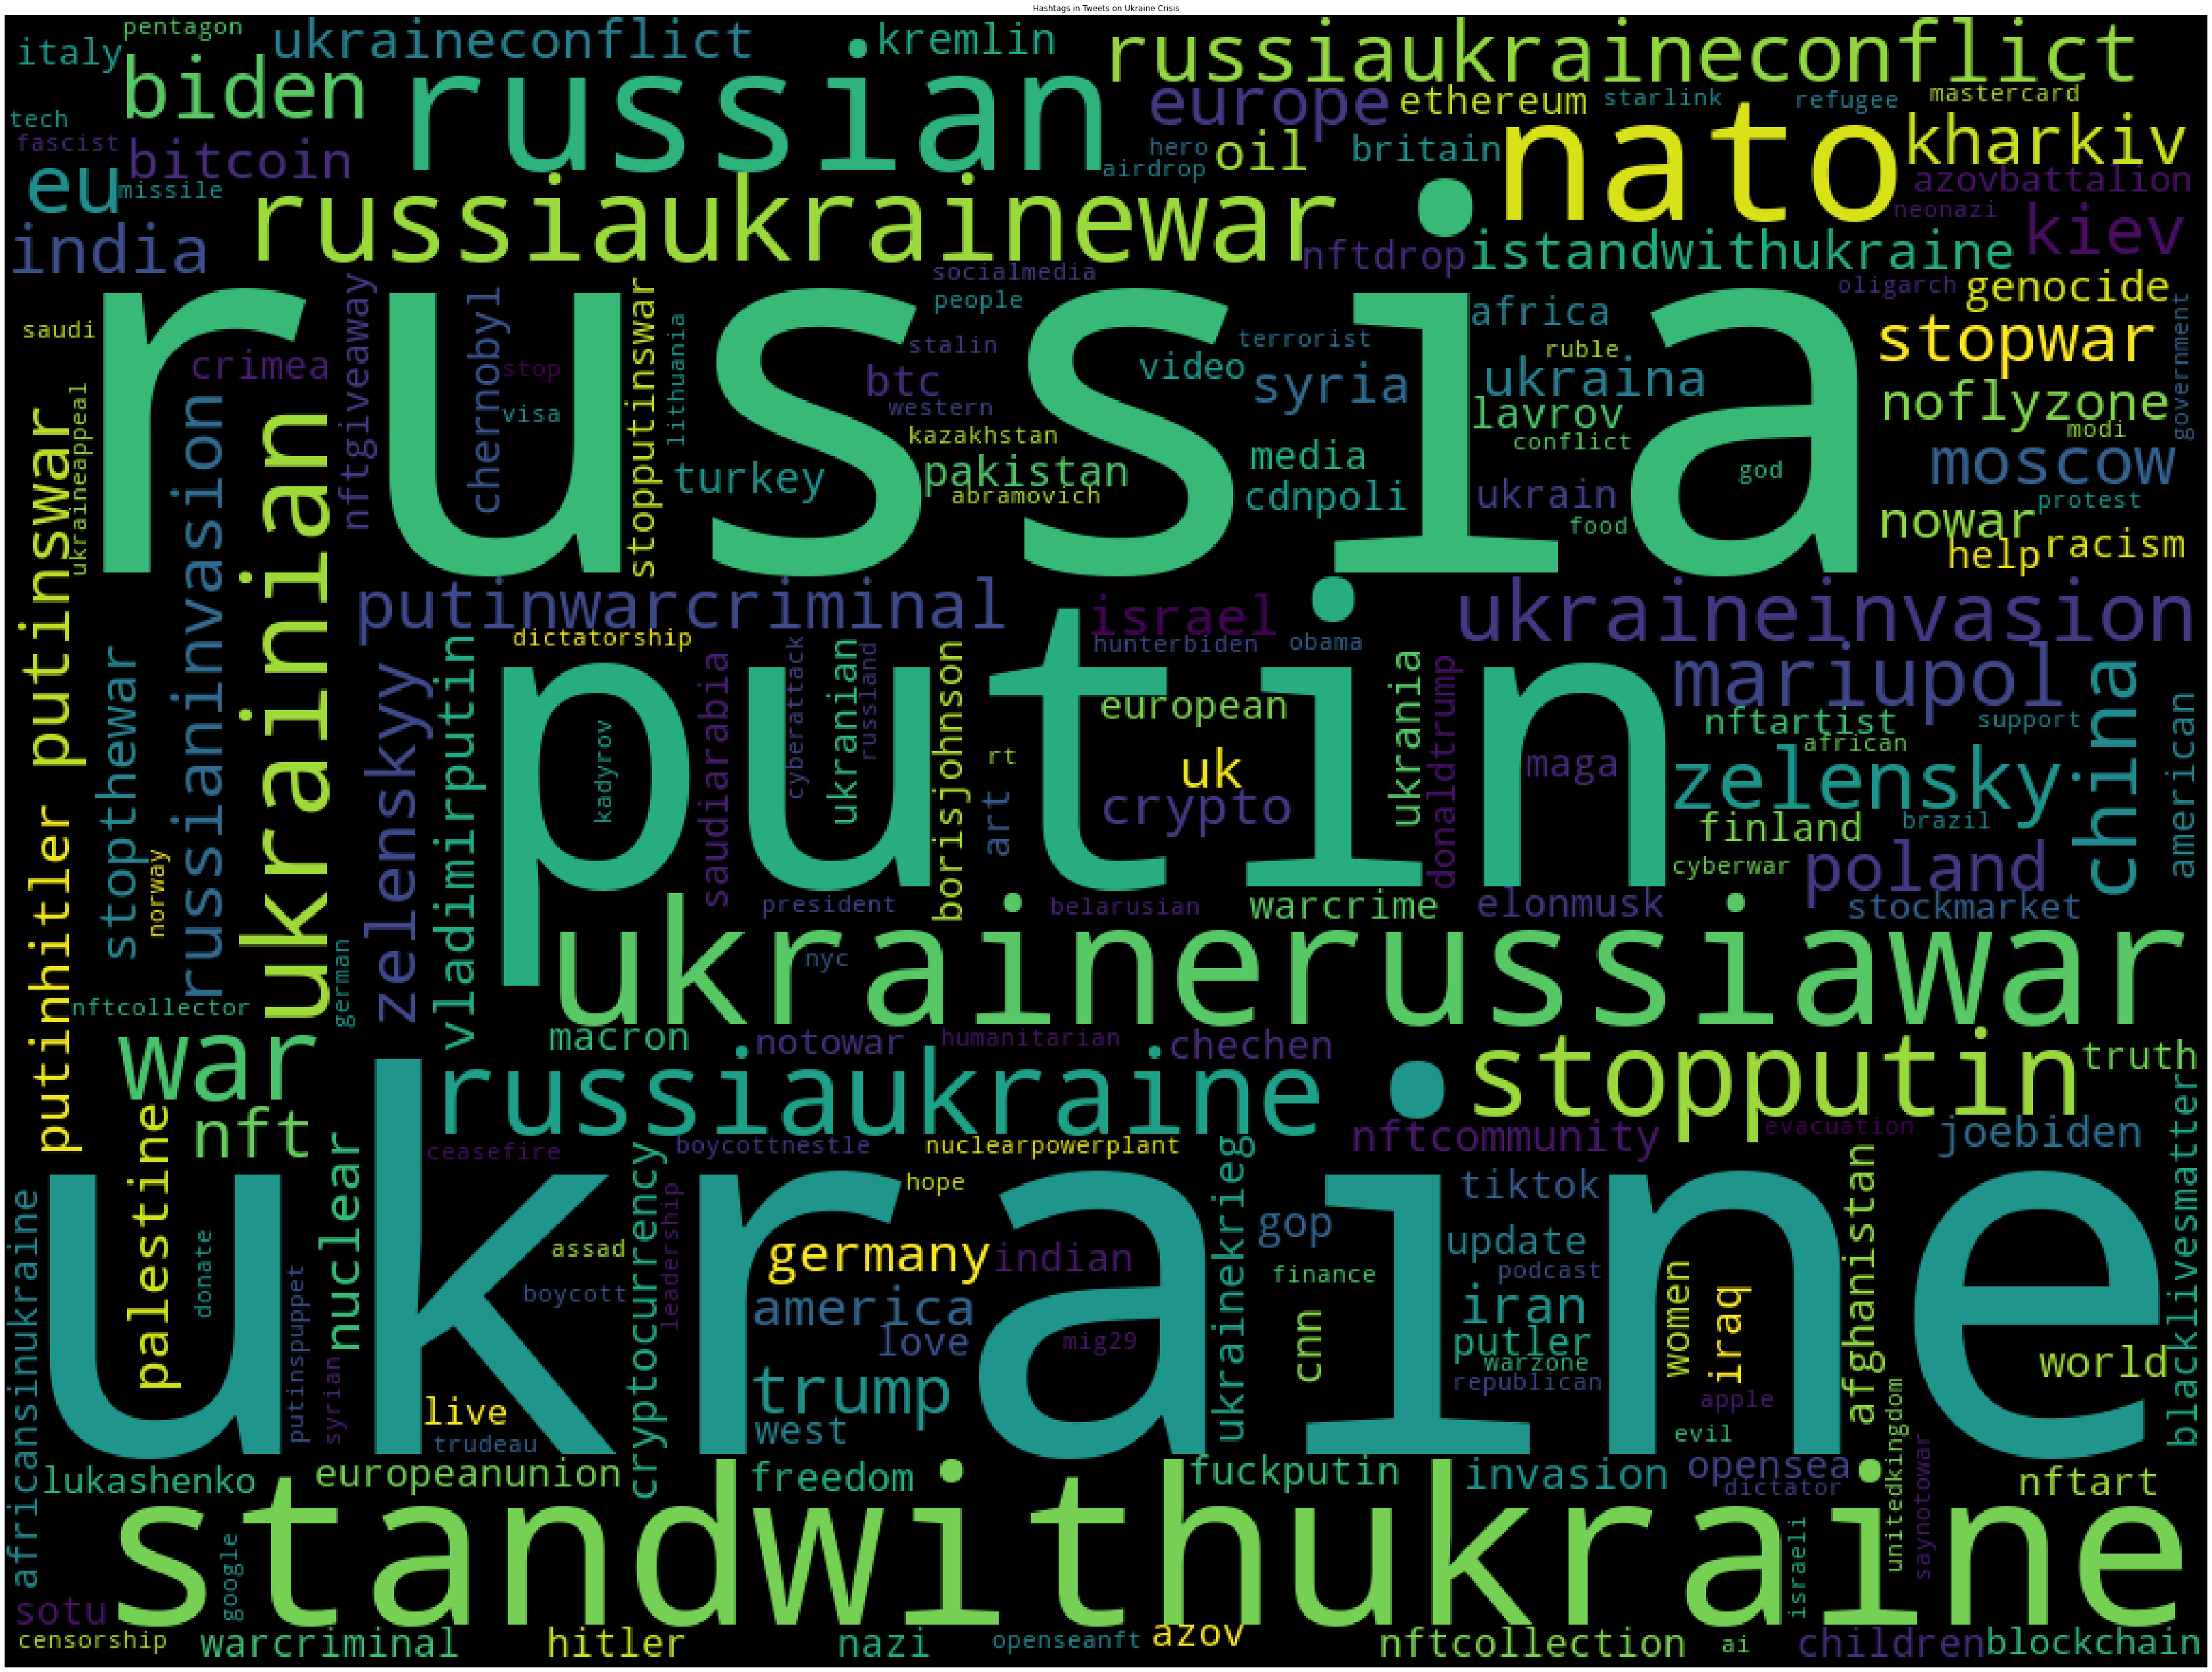

In [207]:
# Create a wordcloud of hashtags
fig,axs = plt.subplots(figsize=(60,60))
random.seed(2022)
random.shuffle(hashtags_clean_df['hashtag'].tolist())
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(hashtags_clean_df['hashtag'].tolist()))    
ax=axs.axis("off")   
ax=axs.set_title('Hashtags in Tweets on Ukraine Crisis')
ax=axs.imshow(wordcloud)
plt.show()

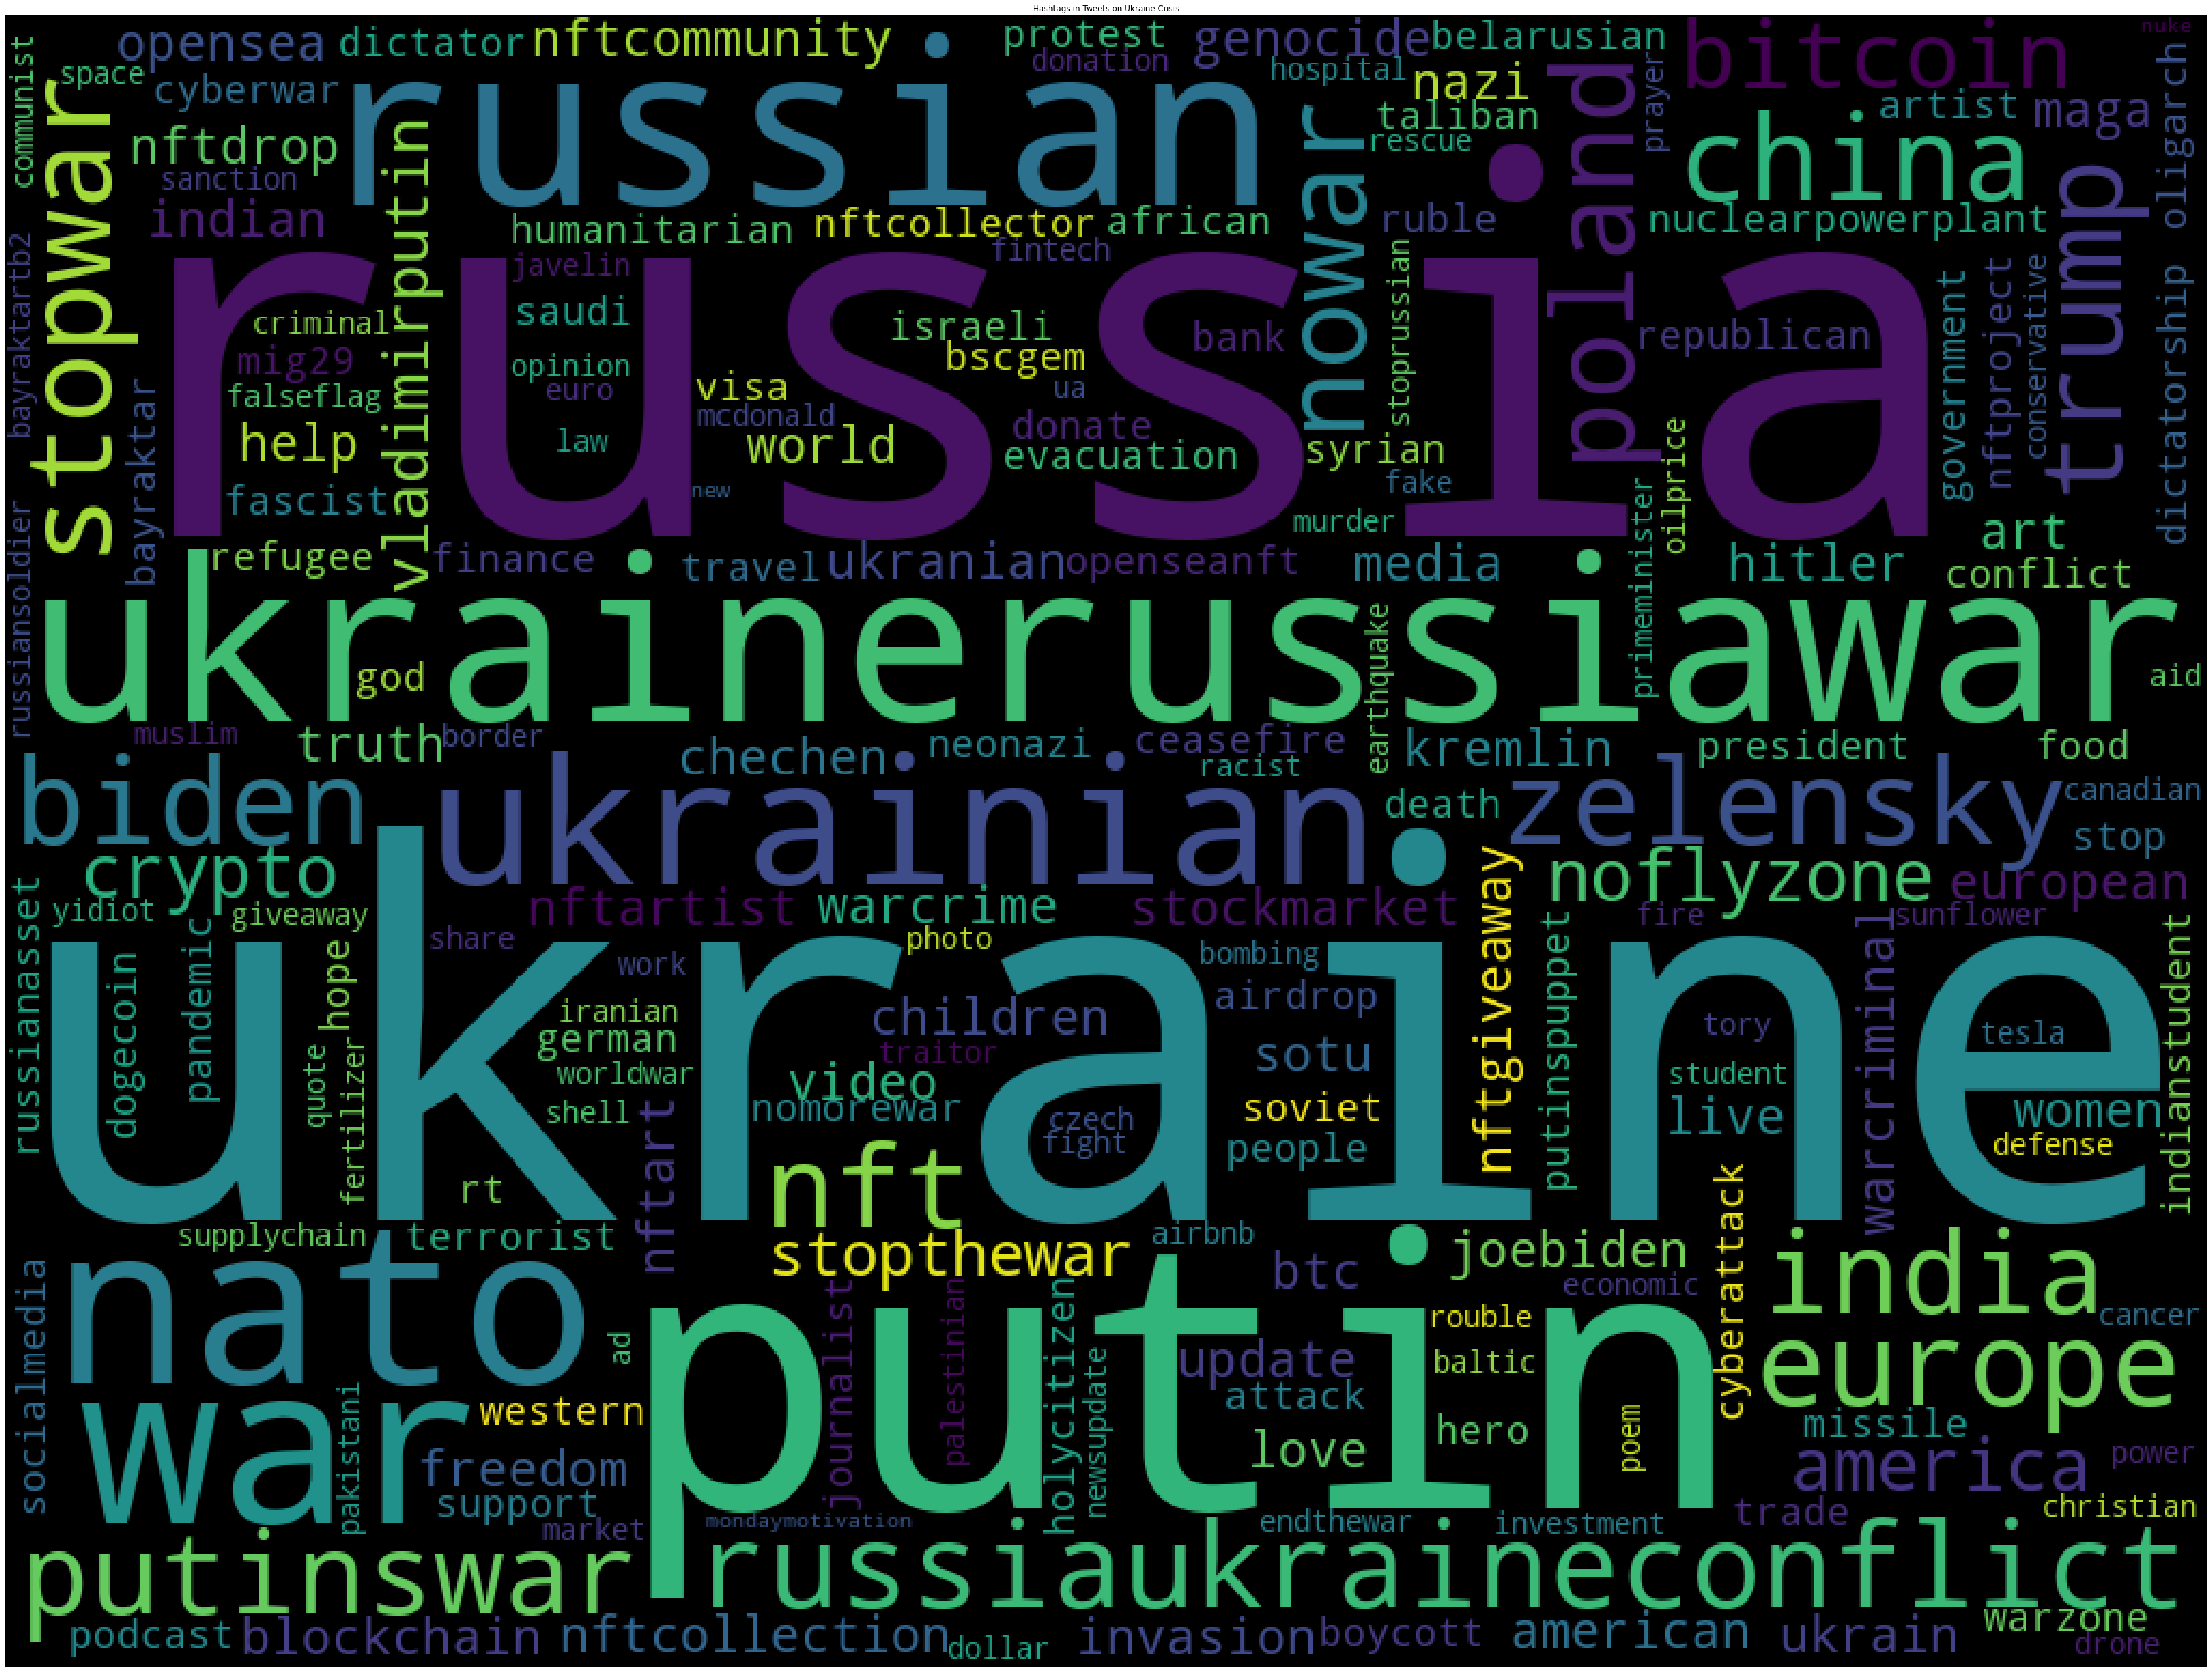

In [209]:
# Create a wordcloud of hashtags
fig,axs = plt.subplots(figsize=(60,60))
random.seed(2022)
random.shuffle(most_freq_tags['hashtag'].tolist())
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(most_freq_tags['hashtag'].tolist()))    
ax=axs.axis("off")   
ax=axs.set_title('Hashtags in Tweets on Ukraine Crisis')
ax=axs.imshow(wordcloud)
plt.show()